# Bayesian Missing Value Imputation

This notebook demonstrates the functionality of the `BayesianImputer` Python module, developed for Bayesian missing value imputation using MCMC methods (Gibbs sampling, Metropolis-Hastings) and Bayesian regression.

It supports:
- MCAR and MAR missingness simulation
- Bayesian multiple imputation
- Posterior diagnostics and visualization
- Overfitting evaluation
- (Optional) causal inference integration

This aligns with the course proposal and responds to feedback encouraging comparison to PyMC and exploration of overfitting risk.


In [10]:
# Imports
from bayes_impute import BayesianImputer
import pandas as pd
import numpy as np

In [2]:
np.random.seed(410)

# Simulate clean data
df_full = pd.DataFrame({
    'age': np.random.normal(30, 5, 100),
    'income': np.random.normal(60000, 8000, 100),
    'score': np.random.normal(75, 10, 100)
})

df_full.head()


,age,income,score
0,24.347147,49594.229120,77.656719
1,33.481001,67878.771400,71.130631
2,27.838535,42448.957365,82.549811
3,33.705102,54487.989041,65.468098
4,27.609314,55799.612189,94.802014


In [3]:
# Initialize imputer
imputer = BayesianImputer(df_full)

# Simulate MCAR or MAR missingness
imputer.simulate_missing(mechanism='MAR', percent=0.2)

# Check missingness summary
imputer.detect_missing_mechanism()


[Init] BayesianImputer initialized with method='gibbs', mechanism='MAR', imputations=5
[Simulate Missing] Applied MAR mechanism with 20.0% missingness.
[Detect] Missing value count per column:
age        0
income     0
score     10
dtype: int64


age        0
income     0
score     10
dtype: int64

In [4]:
 imputer.initialize_missing()
  

[InitMissing] Missing values initialized using column means.


In [5]:
# Use either Gibbs or Metropolis-Hastings
imputer.method = 'gibbs'  # or 'metropolis'
imputer.generate_multiple_imputations()


[Impute] Running gibbs sampling...
[Gibbs] Starting Gibbs sampling...
[Gibbs] Imputation 1 completed.
[Gibbs] Imputation 2 completed.
[Gibbs] Imputation 3 completed.
[Gibbs] Imputation 4 completed.
[Gibbs] Imputation 5 completed.
[Gibbs] Gibbs sampling finished.
[Impute] Imputation complete.


[          age        income      score
 0   24.347147  49594.229120  77.656719
 1   33.481001  67878.771400  71.130631
 2   27.838535  42448.957365  82.549811
 3   33.705102  54487.989041  65.468098
 4   27.609314  55799.612189  94.802014
 ..        ...           ...        ...
 95  39.960864  60910.008049  80.555427
 96  31.917477  68156.783466  81.955860
 97  23.512905  37597.278791  61.591158
 98  36.198990  55212.147373  49.695332
 99  27.490578  61437.354635  79.297432
 
 [100 rows x 3 columns],
           age        income      score
 0   24.347147  49594.229120  77.656719
 1   33.481001  67878.771400  71.130631
 2   27.838535  42448.957365  82.549811
 3   33.705102  54487.989041  65.468098
 4   27.609314  55799.612189  94.802014
 ..        ...           ...        ...
 95  39.960864  60910.008049  80.555427
 96  31.917477  68156.783466  91.205894
 97  23.512905  37597.278791  61.591158
 98  36.198990  55212.147373  49.695332
 99  27.490578  61437.354635  79.297432
 
 [100 rows 

[Visualize Imputations] Generating plots for observed vs. imputed distributions...


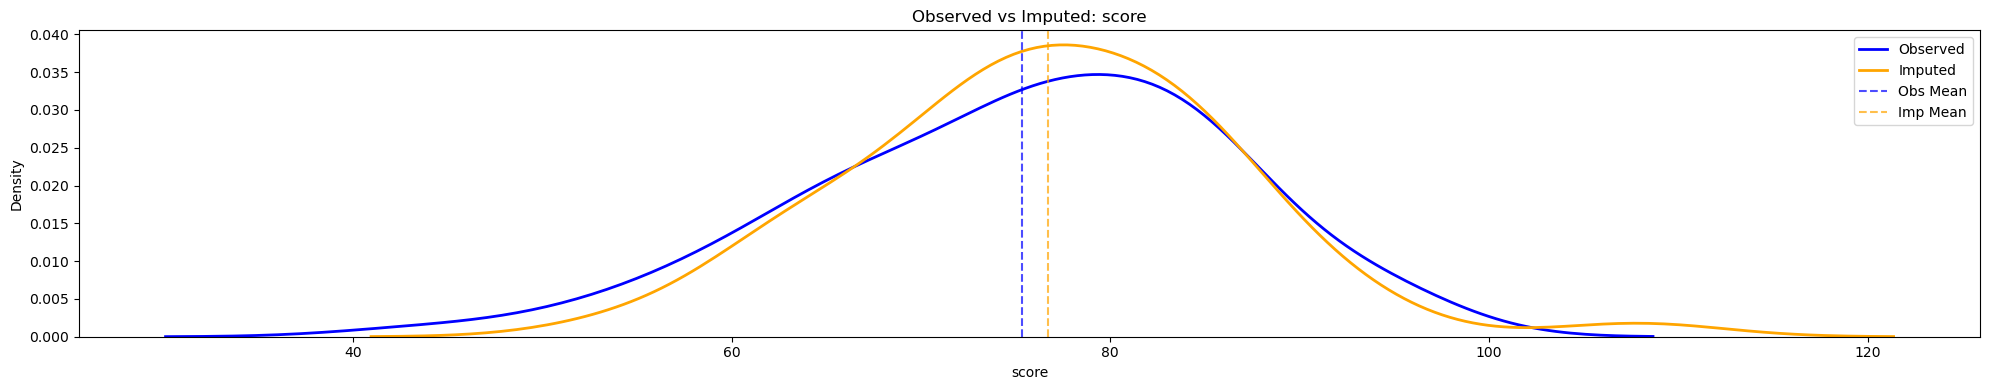

In [6]:
imputer.visualize_imputations()


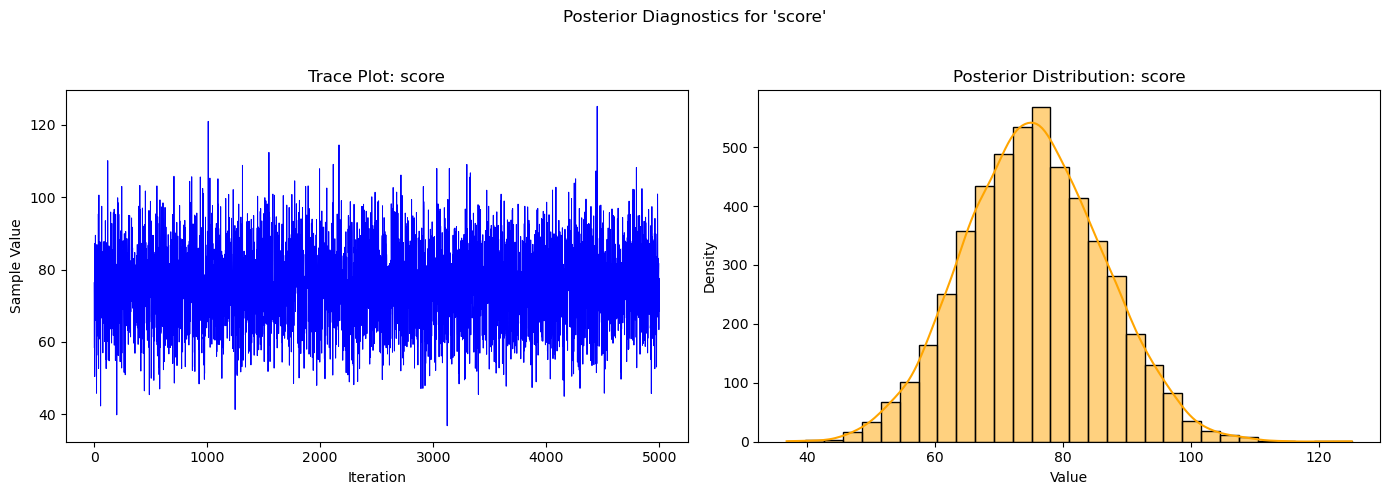

In [7]:
imputer.posterior_diagnostics()


In [8]:
# Run only on one column (e.g., 'income') if you want to isolate it
imputer.bayesian_regression_impute('income')


No missing values in income.


[          age        income      score
 0   24.347147  49594.229120  77.656719
 1   33.481001  67878.771400  71.130631
 2   27.838535  42448.957365  82.549811
 3   33.705102  54487.989041  65.468098
 4   27.609314  55799.612189  94.802014
 ..        ...           ...        ...
 95  39.960864  60910.008049  80.555427
 96  31.917477  68156.783466  81.955860
 97  23.512905  37597.278791  61.591158
 98  36.198990  55212.147373  49.695332
 99  27.490578  61437.354635  79.297432
 
 [100 rows x 3 columns],
           age        income      score
 0   24.347147  49594.229120  77.656719
 1   33.481001  67878.771400  71.130631
 2   27.838535  42448.957365  82.549811
 3   33.705102  54487.989041  65.468098
 4   27.609314  55799.612189  94.802014
 ..        ...           ...        ...
 95  39.960864  60910.008049  80.555427
 96  31.917477  68156.783466  91.205894
 97  23.512905  37597.278791  61.591158
 98  36.198990  55212.147373  49.695332
 99  27.490578  61437.354635  79.297432
 
 [100 rows 

In [9]:
imputer.evaluate_overfitting()


[Overfitting Evaluation]
 - score: RMSE=12.8448, Coverage=80.00%, Width=21.7827


{'score': {'RMSE': 12.8448276710797,
  'Coverage_95%': 0.8,
  'Avg_Credible_Interval_Width': 21.78273718281473}}